In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import MESS
import numpy as np
import pandas as pd

from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


## Load the Weevil data

In [3]:
m_df = pd.read_csv("/home/iovercast/Continuosity/MESS/empirical_data/Mascarene_weevils/mauritius.dat", header=0, index_col=0)
r_df = pd.read_csv("/home/iovercast/Continuosity/MESS/empirical_data/Mascarene_weevils/reunion.dat", header=0)
print(len(m_df), len(r_df))
print(np.sum(m_df["abundance"]))
print(np.sum(r_df["abundance"]))
display(m_df[:2])
display(r_df[:2])

(26, 27)
343.0
539.0


,pi,abundance
Cratopopsis_impressus,0.043741,4.0
Cratopopsis_mauritianus,0.002413,5.0


,Unnamed: 0,pi,abundance
0,Cratopopsis_alluaudi,0.019174,12.0
1,Cratopopsis_antiquus,0.017928,11.0


# Select the best model

In [4]:
simfile = "/home/iovercast/Continuosity/MESS/analysis/full-parameter-estimation/default_MESS/SIMOUT.txt"

## This just creates the Classifier. Feels goofy to pass in the m_df twice, but that's what we've got rn.
cla = MESS.inference.Classifier(empirical_df=m_df, simfile=simfile, algorithm="rf")
for isl, df in zip(["Mauritius", "Reunion"], [m_df, r_df]):
    cla.set_data(df)
    est, proba = cla.predict(select_features=True, param_search=True, quick=False, verbose=False)
    display(isl, est, proba)
    display(cla.feature_importances())

'Mauritius'

,community_assembly_model
estimate,neutral


,competition,filtering,neutral
community_assembly_model,0.004492,0.028886,0.966622


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.042461,0.13724,0.071692,0.065661,0.067081,0.044575,0.037381,0.034502,0.033191,0.072491,0.104897,0.037753,0.036737,0.009014,0.04536,0.046033,0.03921,0.033567,0.015112,0.014779,0.011262


'Reunion'

,community_assembly_model
estimate,neutral


,competition,filtering,neutral
community_assembly_model,0.004758,0.024353,0.970889


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.042461,0.13724,0.071692,0.065661,0.067081,0.044575,0.037381,0.034502,0.033191,0.072491,0.104897,0.037753,0.036737,0.009014,0.04536,0.046033,0.03921,0.033567,0.015112,0.014779,0.011262


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aab41355c90>],
      dtype=object)

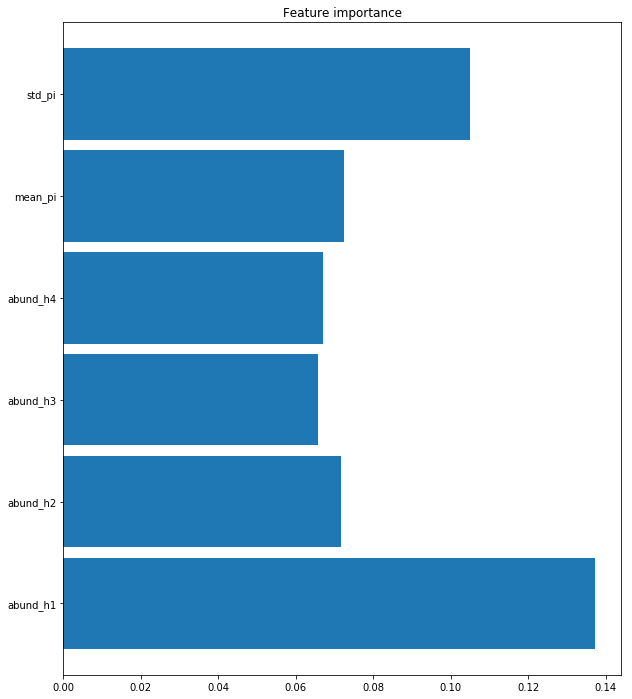

In [5]:
cla.plot_feature_importance()

# Estimate parameters

In [ ]:
rgr = MESS.inference.Regressor(empirical_df=m_df, simfile=simfile, algorithm="rfq")
for isl, df in zip(["Mauritius", "Reunion"], [m_df, r_df]):
    rgr.set_data(df)
    est = rgr.predict(select_features=True, param_search=True, quick=False, verbose=False)
    display(isl, est, rgr.feature_importances())

## Save regressor to file/model to file

In [ ]:
rgr.feature_importances()
#rgr.model_by_target

# Trash below here

In [56]:
simfile = "/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=sp_df, simfile=simfile, algorithm="rf", verbose=True)
cla._base_model
cla.y[:2]
#rgr.set_targets(target_list="_lambda")
#rgr.predict(select_features=True, quick=False, verbose=True)

Got empirical summary statistics:     S   abund_h1   abund_h2   abund_h3  abund_h4      pi_h1      pi_h2      pi_h3      pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi   iqr_pi  trees  abundance_pi_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  57  22.334174  14.092503  10.622744  8.877024  27.956422  21.660417  19.178423  17.853145  0.008283  0.010581      1.41016     0.756963   0.003258  0.01004      0          0.413119     32      7      5      0      2      4      1      3      1      2


,community_assembly_model
0,neutral
1,neutral


In [ ]:
for isl, df in zip(["Mauritius", "Reunion"], [m_df, r_df]):
    cla = MESS.inference.Classifier(empirical_df=df, simfile=simfile, algorithm="rf")
    est, proba = cla.predict(select_features=True, param_search=True, quick=False, verbose=False)
    display(isl, est, proba)
    display(cla.feature_importances())
    rgr = MESS.inference.Regressor(empirical_df=df, simfile=simfile, algorithm="rfq")

    est = rgr.predict(select_features=False, param_search=False, quick=True, verbose=True)
    display(isl, est, rgr.feature_importances())